In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, shapiro

# Load the cleaned dataset
df_temp = pd.read_csv('global_temperature.csv')
df_co2 = pd.read_csv('cleaned_co2_data.csv')
df_disasters = pd.read_csv('cleaned_climate_disasters.csv')

# Sum co2 from 1970 to 2017
global_co2 = df_co2.groupby('Year')['value'].sum().reset_index()

# Rename the column for clarity
global_co2 = global_co2.rename(columns={'value': 'co2_milj_tons'})   
global_co2["co2_milj_tons"] = global_co2["co2_milj_tons"] /1000  # Convert to million tons

# Sum disasters from 1970 to 2017
number_disasters = df_disasters.groupby("Year")["Disaster Type"].count().reset_index() # Grouping by year and counting disasters
number_disasters = number_disasters.rename(columns={"Disaster Type": "disasters_count"}) # Renaming for clarity 

# Merge alla year colums from df_disasters, global_co2 and df_temp (Inner join)
merged = pd.merge(number_disasters, global_co2, left_on="Year", right_on="Year")
merged = pd.merge(merged, df_temp, left_on="Year", right_on="Year")

# Add the rolling average value for disaster
merged["rolling_disasters"] = merged["disasters_count"].rolling(window=3).mean()


# Test for normality on 'co2_milj_tons'
shapiro_co2_stat, shapiro_co2_p = shapiro(merged["co2_milj_tons"].dropna())
print(f"Shapiro-Wilk test for CO2: stat={shapiro_co2_stat:.3f}, p={shapiro_co2_p:.5f}")

# Test for normality on 'disasters_count'
shapiro_disasters_stat, shapiro_disasters_p = shapiro(merged["disasters_count"].dropna())
print(f"Shapiro-Wilk test for Disasters Count: stat={shapiro_disasters_stat:.3f}, p={shapiro_disasters_p:.5f}")

# Spearman correlation between temperature and disasters
r_temp_spear, p_temp_spear = spearmanr(merged["Temperature"], merged["disasters_count"])
print(f"Spearman correlation between temperature and disasters count: r={r_temp_spear:.3f}, p={p_temp_spear:.25f}")

# Spearman correlation between co2 and disasters
r_co2_spear, p_co2_spear = spearmanr(merged["co2_milj_tons"], merged["disasters_count"])
print(f"Spearman correlation between CO2 and disasters count: r={r_co2_spear:.3f}, p={p_co2_spear:.25f}")


Shapiro-Wilk test for CO2: stat=0.924, p=0.00318
Shapiro-Wilk test for Disasters Count: stat=0.930, p=0.00555
Spearman correlation between temperature and disasters count: r=0.873, p=0.0000000000000001289824390
Spearman correlation between CO2 and disasters count: r=0.890, p=0.0000000000000000054034134


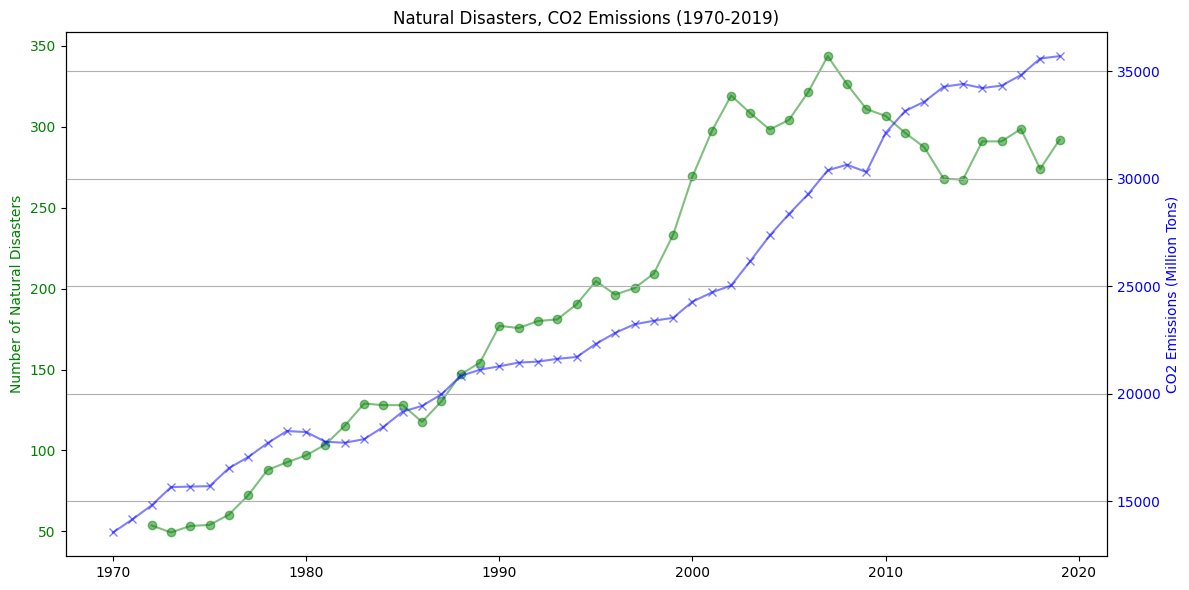

In [31]:
# Create a graf for the correlation between co2 and disasters
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Natural Disasters
ax1.plot(merged["Year"], merged["rolling_disasters"], color='green', label='Natural Disasters', marker = "o", alpha=0.5)

ax1.set_ylabel('Number of Natural Disasters', color='green') # Set the y-axis label color to green
ax1.tick_params(axis='y', labelcolor='green') # Set the color of the y-axis ticks to green

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# Plotting CO2 Emissions
ax2.plot(merged["Year"], merged["co2_milj_tons"], color='blue', label='CO2 Emissions (Million Tons)', marker = "x", alpha=0.5)
ax2.set_ylabel('CO2 Emissions (Million Tons)', color='blue') # Set the y-axis label color to blue
ax2.tick_params(axis='y', labelcolor='blue') # Set the color of the y-axis ticks to blue

plt.title("Natural Disasters, CO2 Emissions (1970-2019)")
plt.xlabel("Year")
plt.grid(True) # Add grid for better readability
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Show the plot

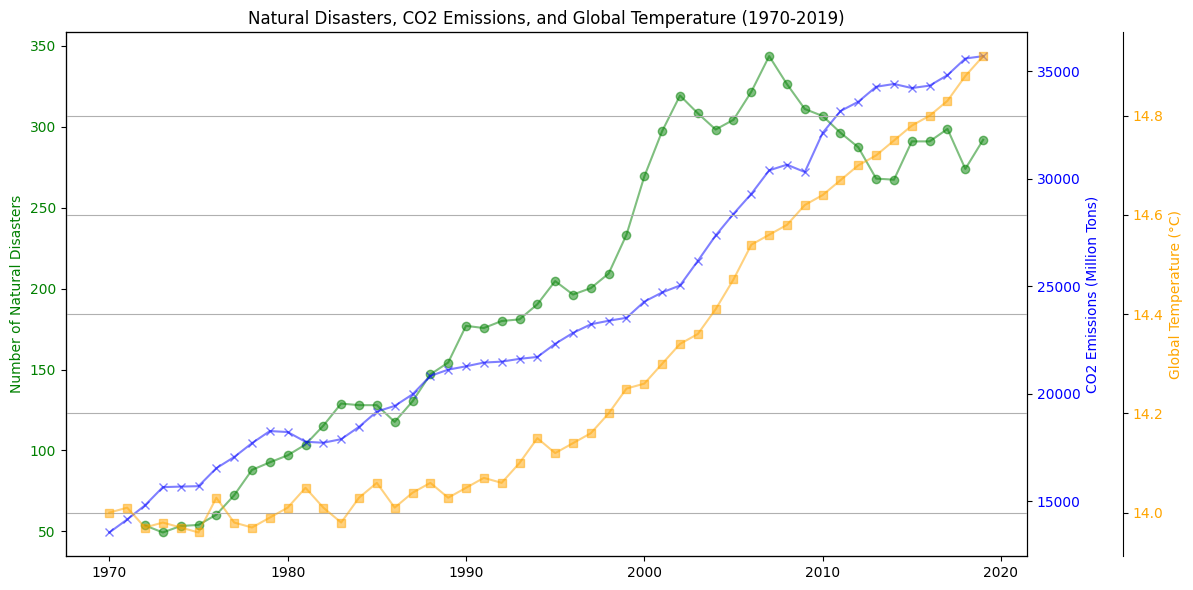

In [32]:

# Create a graf for the correlation between co2, disasters and temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Natural Disasters
ax1.plot(merged["Year"], merged["rolling_disasters"], color='green', label='Natural Disasters', marker = "o", alpha=0.5)

ax1.set_ylabel('Number of Natural Disasters', color='green') # Set the y-axis label color to green
ax1.tick_params(axis='y', labelcolor='green') # Set the color of the y-axis ticks to green

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# Plotting CO2 Emissions
ax2.plot(merged["Year"], merged["co2_milj_tons"], color='blue', label='CO2 Emissions (Million Tons)', marker = "x", alpha=0.5)
ax2.set_ylabel('CO2 Emissions (Million Tons)', color='blue') # Set the y-axis label color to blue
ax2.tick_params(axis='y', labelcolor='blue') # Set the color of the y-axis ticks to blue

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(("axes", 1.1))  # Move the third y-axis to the right
# Plotting Global Temperature
ax3.plot(merged["Year"], merged["Temperature"], color='orange', label='Global Temperature (°C)', marker = "s", alpha=0.5)
ax3.set_ylabel('Global Temperature (°C)', color='orange') # Set the y-axis label color to orange
ax3.tick_params(axis='y', labelcolor='orange') # Set the color of the y-axis ticks to orange

plt.title("Natural Disasters, CO2 Emissions, and Global Temperature (1970-2019)")
plt.xlabel("Year")
plt.grid(True) # Add grid for better readability
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Show the plot

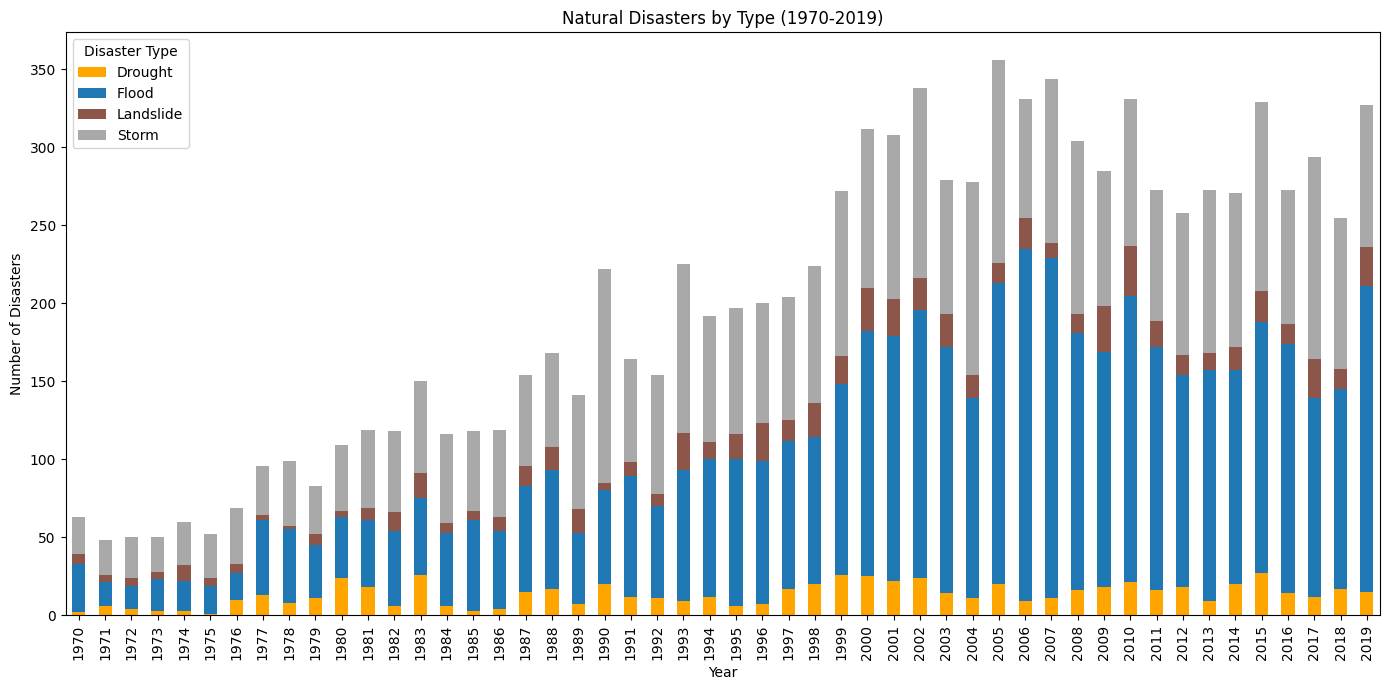

In [33]:
disaster_types = df_disasters.groupby(["Year", "Disaster Type"]).size().unstack(fill_value=0)

colors = {
    'Drought': '#FFA500',     # orange
    'Flood': '#1f77b4',       # blå
    'Landslide': '#8c564b',   # brun
    'Storm': '#A9A9A9'        # mörk grå
}

color_list = [colors[disaster] for disaster in disaster_types.columns]

# ✅ Endast ett diagram ritas
disaster_types.plot(kind='bar', stacked=True, figsize=(14, 7), color=color_list)

plt.title("Natural Disasters by Type (1970-2019)")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.tight_layout()
plt.show()